# Plan
# 1. Imports
# 2. File imports and merging
# 3. Feature engineering
# 4. Data cleaning
# 5. EDA
# 6. Machine learning

In [7]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib import cm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

# 2. File imports and merging

In [8]:
if False:
    df_games = pd.read_csv('../1. Input/games.csv')
    df_clubs = pd.read_csv('../1. Input/clubs.csv')
    df_competitions = pd.read_csv('../1. Input/competitions.csv')
    df_game_events = pd.read_csv('../1. Input/game_events.csv')
    df_players = pd.read_csv('../1. Input/players.csv')
    df_appearances = pd.read_csv('../1. Input/appearances.csv')
    
    # merge datasets
    ## subset required games columns
    df = df_games[["game_id", "competition_id", "season", "date", "home_club_id", "away_club_id",
                   "home_club_goals", "away_club_goals", "home_club_position", "away_club_position",
                   "stadium", "attendance", "home_club_formation", "away_club_formation",
                   "home_club_name", "away_club_name", "competition_type"]]
    # print("original", "\n", df.columns, df.shape)
    
    ## merge games/clubs on home_id / away_id > club_id
    df_clubs.rename(columns={"club_id": "home_club_id"}, inplace=True)
    df = pd.merge(df,
                  df_clubs[['home_club_id', 'average_age', 'stadium_seats', 'net_transfer_record']],
                  on="home_club_id", how="left")
    df.rename(columns={"average_age": "home_average_age",
                       "net_transfer_record": "home_net_transfer_record"}, inplace=True)
    df_clubs.rename(columns={"home_club_id": "away_club_id"}, inplace=True)
    df = pd.merge(df, df_clubs[['away_club_id', 'average_age', 'net_transfer_record']],
                  on="away_club_id", how="left")
    df.rename(columns={"average_age": "away_average_age",
                       "net_transfer_record": "away_net_transfer_record"}, inplace=True)
    # print("clubs joined", "\n", df.columns, df.shape)
    
    ## merge games/competitions on comp_id > dom_comp_id
    df = pd.merge(df, df_competitions[['competition_id', 'name', 'country_name']],
                  on="competition_id", how="left")
    df.rename(columns={"name": "competition_name", "country_name": "competition_country"},
              inplace=True)
    # print("competitions joined", "\n", df.columns, df.shape)
    
    ## merge games/game_events on game_id > game_id
    # to replace first() with agg(list) and/or custom aggregation function, following cleaning
    df_game_events_grouped = df_game_events.groupby(
        'game_id').first().reset_index()  # first used as dummy for now
    df = pd.merge(df, df_game_events_grouped[['game_id', 'minute', 'type', 'description']],
                  on="game_id", how="left")
    df.rename(columns={"minute": "home_event_minute", "type": "home_event_type",
                       "description": "home_event_description"}, inplace=True)
    df = pd.merge(df, df_game_events_grouped[['game_id', 'minute', 'type', 'description']],
                  on="game_id", how="left")
    df.rename(columns={"minute": "away_event_minute", "type": "away_event_type",
                       "description": "away_event_description"}, inplace=True)
    
    # print("game events joined", "\n", df.columns, df.shape)
    
    ## merge appearances/players on player_id > player_id
    # to replace first() with agg(list) and/or custom aggregation function, following cleaning
    df_appearances = pd.merge(df_appearances, df_players[
        ['player_id', 'height_in_cm', 'highest_market_value_in_eur']], on="player_id", how="left")
    df_appearances.rename(
        columns={"height_in_cm": "height", "highest_market_value_in_eur": "market_value"},
        inplace=True)
    
    ## merge games/appearances on game_id > game_id
    # to replace first() with agg(list) and/or custom aggregation function, following cleaning
    df_appearances_grouped = df_appearances.groupby(
        'game_id').first().reset_index()  # first used as dummy for now
    df = pd.merge(df, df_appearances_grouped[['game_id', 'assists', 'height', 'market_value']],
                  on="game_id", how="left")
    df.rename(columns={"assists": "home_assists", "height": "home_height",
                       "market_value": "home_market_value"}, inplace=True)
    df = pd.merge(df, df_appearances_grouped[['game_id', 'assists', 'height', 'market_value']],
                  on="game_id", how="left")
    df.rename(columns={"assists": "away_assists", "height": "away_height",
                       "market_value": "away_market_value"}, inplace=True)
    # print("appearances joined", "\n", df.columns, df.shape)
    
    # save dataframe
    df.to_csv("../4. Outputs/master_df.csv", index=False)
    print("Saved csv merging", df.shape)

# 3. Feature engineering (creating additional columns to use as explanatory variables)


In [9]:
if False:
    df = pd.read_csv("../4. Outputs/master_df.csv")

    # create temporary game_event output columns
    df['home_red_cards'] = df['home_yellow_cards'] = df['away_red_cards'] = df[
        'away_yellow_cards'] = 0
    # create temporary appearances output columns
    df['home_goal_scoring_opp'] = df['away_goal_scoring_opp'] = 0

    # Input: Merged master dataframe
    # Output: Merged master dataframe with all new columns

    # save dataframe
    df.to_csv("../4. Outputs/master_df.csv", index=False)
    print("Saved csv feature", df.shape)

# 4. Data Cleaning

In [10]:
if False:
    df = pd.read_csv("../4. Outputs/master_df.csv")

    # Input: Merged master dataframe with all new columns
    # Output: Final master dataframe for EDA and ML

    # Loop through all numeric columns and impute NA with 0
    num_cols = df.select_dtypes(include='number').columns
    df[num_cols] = df[num_cols].fillna(0)

    # Loop through all categorical columns and impute NA with "Unknown"
    cat_cols = df.select_dtypes(include='object').columns
    df[cat_cols] = df[cat_cols].fillna("Unknown")

    # print(df.isnull().sum())

    # save dataframe
    df.to_csv("../4. Outputs/master_df.csv", index=False)
    print("Saved csv cleaning", df.shape)

# 5. EDA

In [11]:
# Histograms
def hist_plot(df, column):
    plt.figure()  # creates figure object to make graph
    sns.histplot(data=df[column])
    plt.title(f"Histogram of {column}")
    plt.show()

# Bar Charts
def bar_plot_single(df, x_col):
    plt.figure()
    color_value = random.random()
    sns.barplot(data=df, x=x_col,
                hue=x_col, palette="Dark2",
                dodge=False, legend=False)
    plt.title(f"bar chart of {x_col}")
    plt.show()

def bar_plot(df, x_col, y_col):
    plt.figure()
    color_value = random.random()
    sns.barplot(data=df, x=x_col, y=y_col,
                hue=x_col, palette="Dark2",
                dodge=False, legend=False)
    plt.title(f"bar chart of {x_col} and {y_col}")
    plt.show()

# Scatter Plots
def scat_plot(df, x_col, y_col):
    plt.figure()
    # Generate a random color using RGB values
    color_value = random.random()
    colormap = cm.get_cmap('crest')
    color = colormap(color_value)
    sns.scatterplot(data=df, x=x_col, y=y_col, color=color)
    plt.title(f"scatter chart of {x_col} and {y_col}")
    plt.show()

# count of observations for categorical cols.
def catplot(df, col_name):
    plt.figure()
    sns.countplot(data=df, x=col_name,
                  hue=col_name, palette='viridis')
    plt.title(f'Countplot of {col_name}')
    plt.show()

# Line Charts
def line_plot(df, x_col, y_col):
    plt.figure()
    sns.lineplot(data=df, x=x_col, y=y_col)
    plt.title(f"line chart of {x_col} and {y_col}")
    plt.show()

# Box plots
def box_plot(df, x_col, y_col):
    plt.figure()
    sns.boxplot(data=df, x=x_col, y=y_col,
                hue=x_col, palette='viridis')
    plt.title(f"box chart of {x_col} and {y_col}")
    plt.show()

# Heatmap
def mheat(df):

    # select only the column that has number in it.
    corr = df.select_dtypes(include=['number'])

    ''' .empty checks if the dataframe (corr) is empty or not. 
    If it is empty,it will print the message. If it is not (if not corr.empty), it will create a heatmap.
    '''
    if not corr.empty:
        plt.figure()
        sns.heatmap(data=corr.corr(), annot=True, cmap='PiYG')
        plt.title("Correlation Heatmap")
        plt.show()
    else:
        print("No numeric data found")

# Kde plots
def kde_plot(df, x_col, cat_var):
    plt.figure()
    sns.kdeplot(data=df, x=x_col, hue=cat_var, multiple='fill')
    plt.title(f"KDE plot of {x_col} and {cat_var}")
    plt.show()

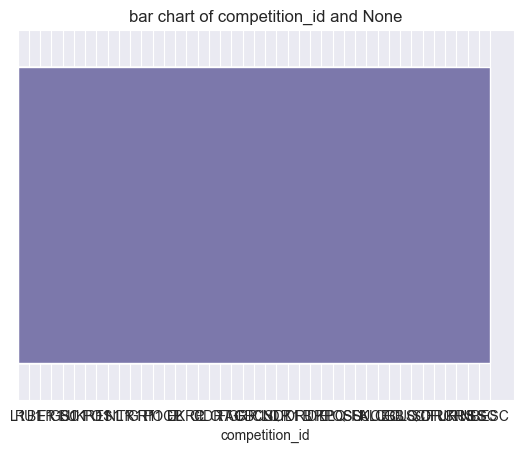

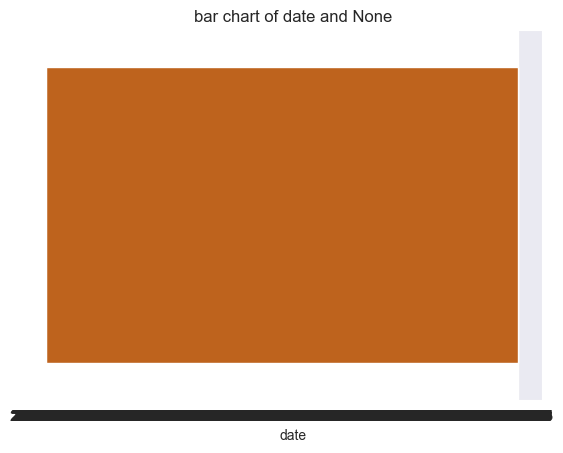

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001DCFAD98040> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

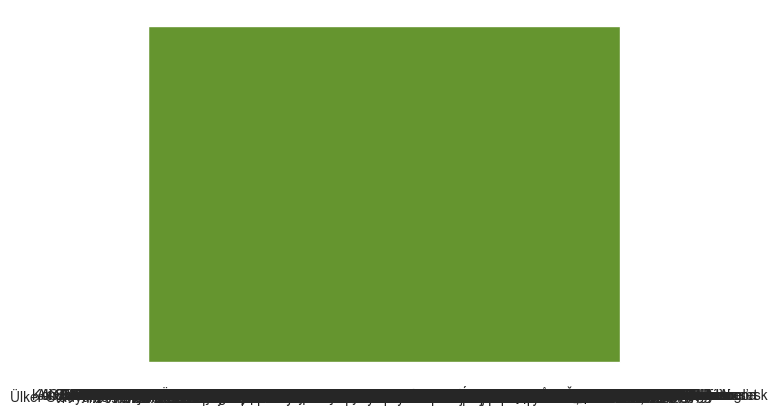

In [12]:
if True:
    df = pd.read_csv("../4. Outputs/master_df.csv")

    # Input: Final master dataframe for EDA and ML
    # Output: EDA charts / metrics (print or save to png in output folder)

    # Run EDA functions
    # Loop through all numeric columns and create histograms
    # num_cols = df.select_dtypes(include='number').columns
    # for col in num_cols:
    #     hist_plot(df, col)

    # Loop through all categorical columns and impute NA with "Unknown"
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        bar_plot(df, col, None)

    # save dataframe
    df.to_csv("../4. Outputs/master_df.csv", index=False)
    print("Saved csv EDA", df.shape)

# 6. ML

In [6]:
if True:
    df = pd.read_csv("../4. Outputs/master_df.csv")

    # Individual ML code (including training/test split, model training and evaluation)
    # Input: Final master dataframe for EDA and ML
    # Output: Predicted dependent variables (home + away goals) for test dataset, model accuracy

    # save dataframe
    df.to_csv("../4. Outputs/master_df.csv", index=False)
    print("Saved csv ML", df.shape)

Saved csv ML (66296, 42)
